# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
## Make sure analysis.py and utils.py are in the same directory as this notebook
from analysis import *
from utils import *

# Import Processed Data

In [2]:
## Read the data for single and shared trips
## For shared trips we have two dataframes: requested and realized which indicate the number of trips requested and the number of trips realized/matched
## For single trips we have only one dataframe which indicates the number of trips realized (ended up as single trips)
df_shared_requested = data_read('processed_data','shared', 'requested')
df_shared_realized = data_read('processed_data','shared', 'realized')
df_single_realized = data_read('processed_data','single', 'realized')

## Combine data from all three dataframes
df_merged = df_single_realized.merge(df_shared_realized, on=['pickup_hour', 'pickup_date', 'pickup_day', 'pickup_month'], how = 'inner')
df_merged = df_merged.merge(df_shared_requested, on=['pickup_hour', 'pickup_date', 'pickup_day', 'pickup_month'], how = 'inner')
df_merged['trip_minutes_single_realized'] = df_merged['trip_seconds_single_realized']/60
df_merged['trip_minutes_shared_realized'] = df_merged['trip_seconds_shared_realized']/60

In [3]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8758 entries, 0 to 8757
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   pickup_hour                        8758 non-null   int64  
 1   pickup_date                        8758 non-null   int64  
 2   pickup_day                         8758 non-null   int64  
 3   pickup_month                       8758 non-null   int64  
 4   trip_seconds_single_realized       8758 non-null   float64
 5   trip_miles_single_realized         8758 non-null   float64
 6   trip_mph_single_realized           8758 non-null   float64
 7   fare_mile_single_realized          8758 non-null   float64
 8   fare_minute_single_realized        8758 non-null   float64
 9   fare_total_single_realized         8758 non-null   float64
 10  fare_single_realized               8758 non-null   float64
 11  tip_single_realized                8758 non-null   float

# Willingness to Share (WTS)

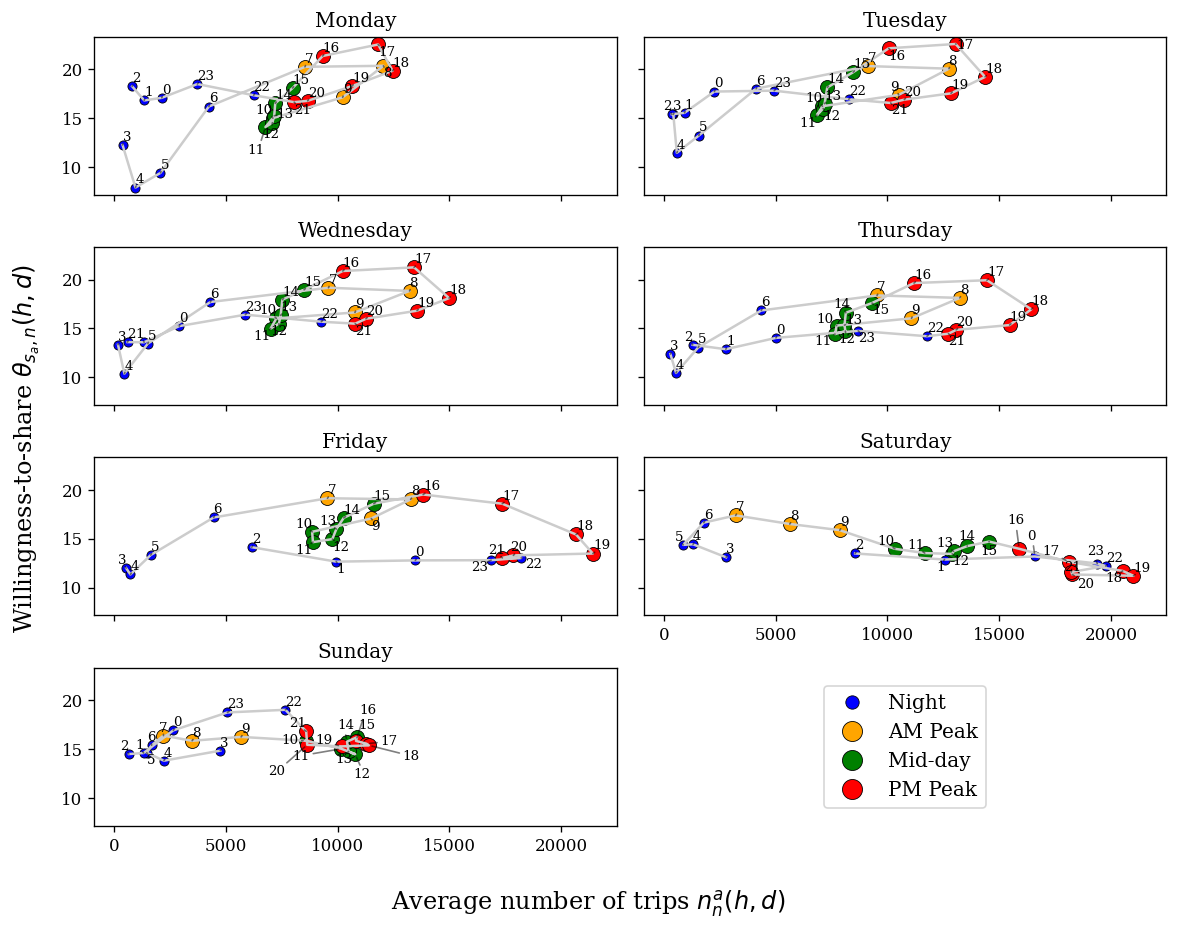

In [4]:
df_day_merged = df_day('processed_data', region = None)
plot_willingness_to_share(df_day_merged,'')

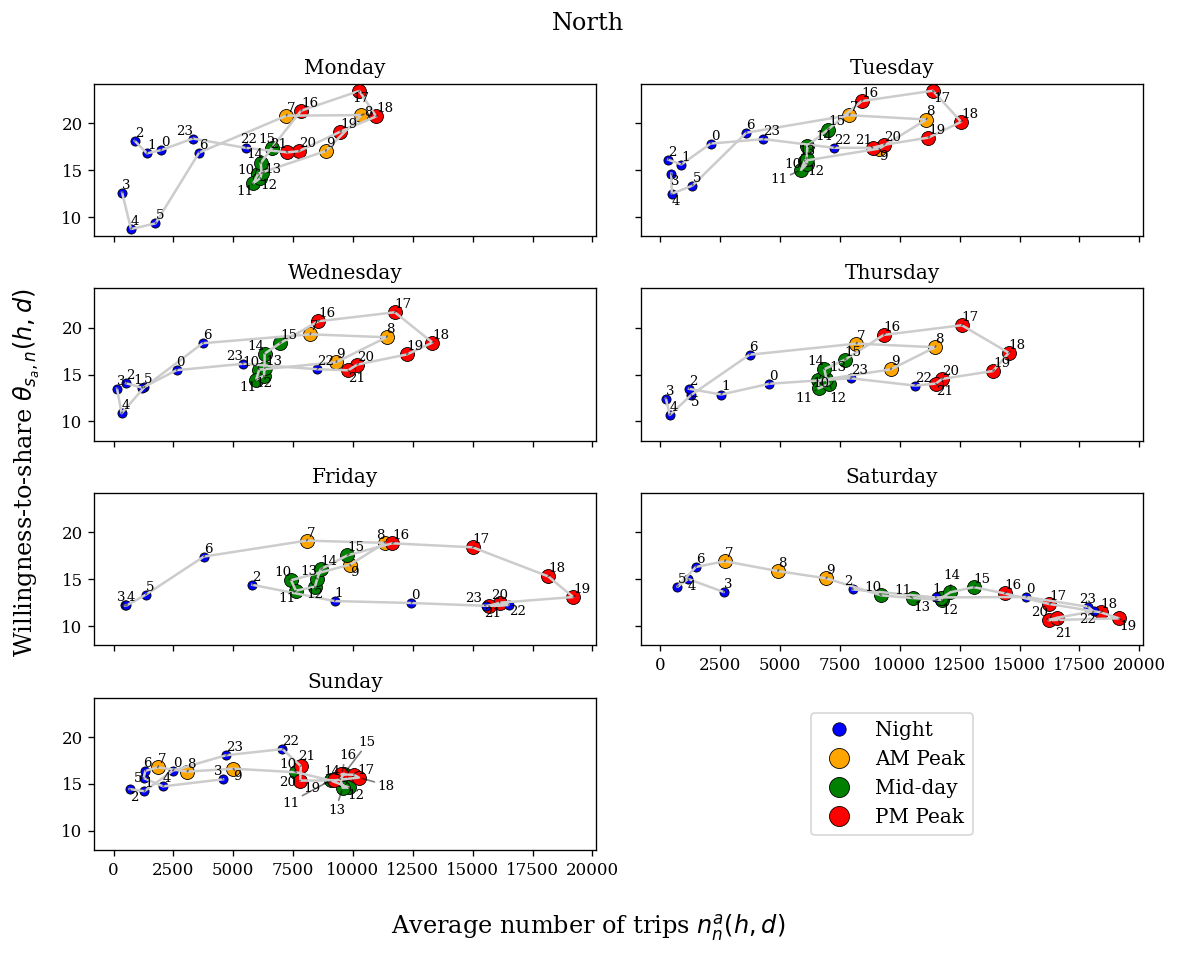

In [5]:
df_day_merged = df_day_Jan_Sep(folder = 'processed_data',region = 'north')
plot_willingness_to_share(df_day_merged,'North')

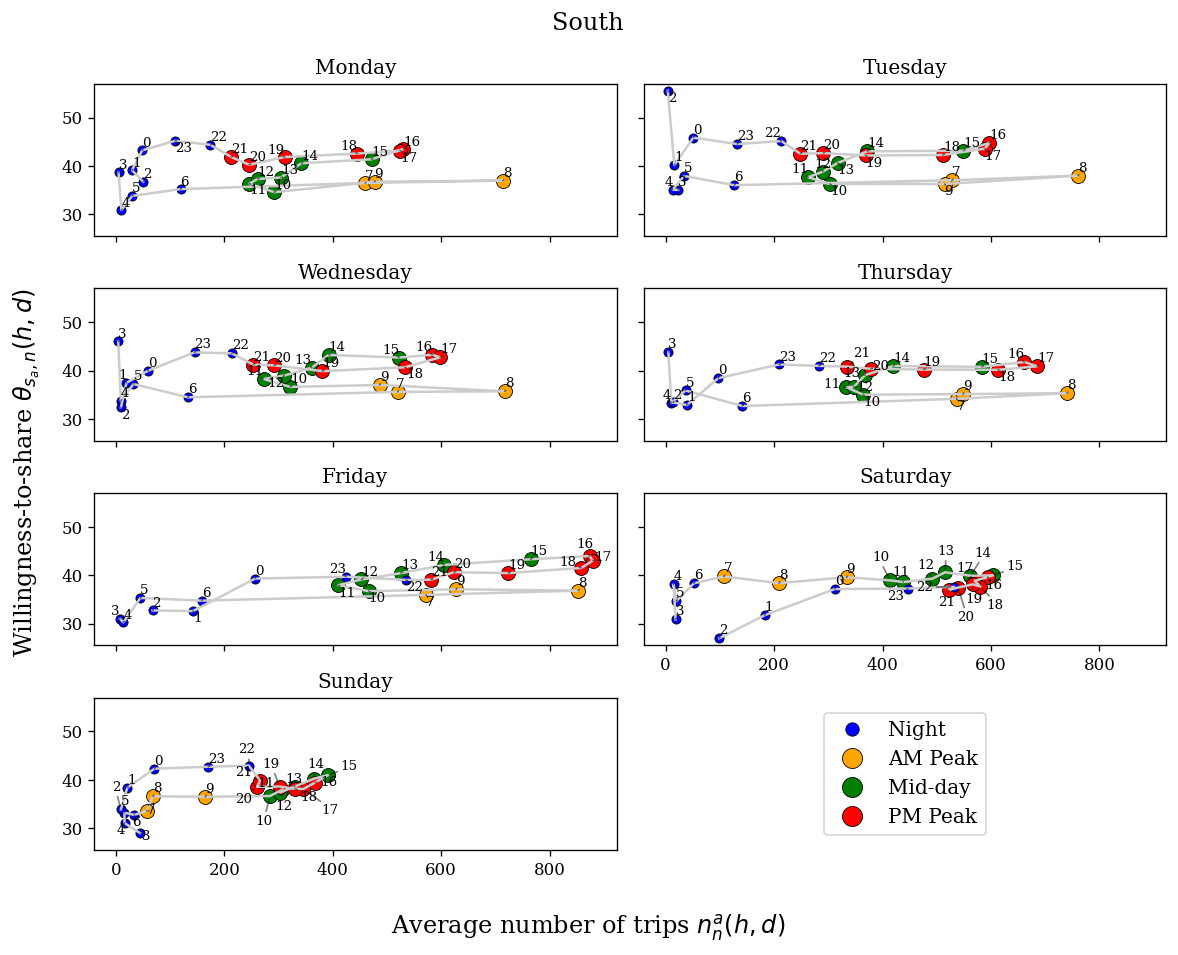

In [6]:
df_day_merged = df_day_Jan_Sep(folder = 'processed_data',region = 'south')
plot_willingness_to_share(df_day_merged,'South')

# Match Rate/Percentage

28.055265547906888


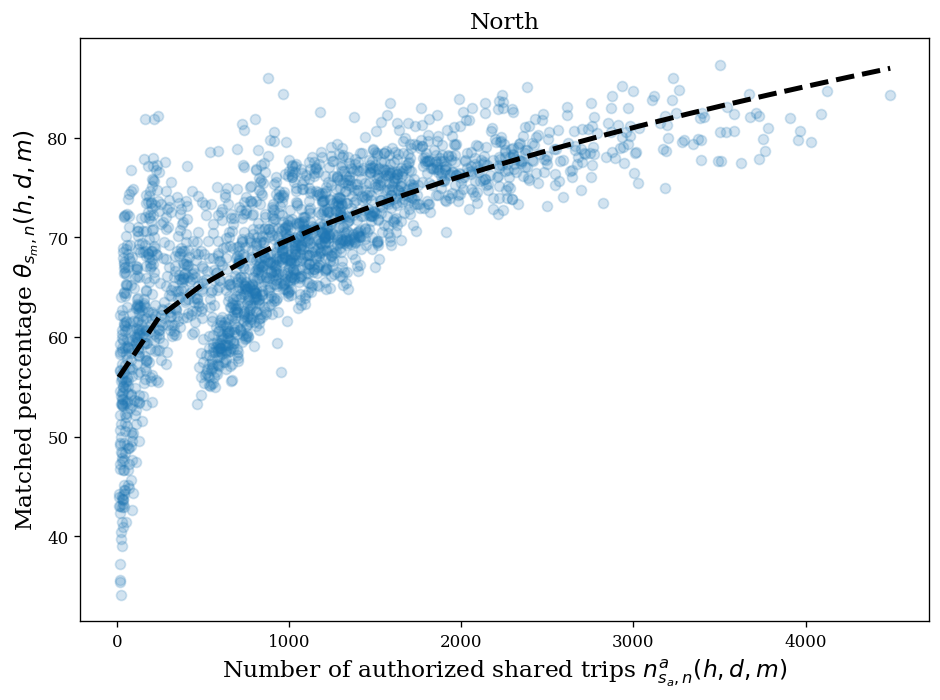

In [7]:
df_hdm = agg_hdm('processed_data','north')
plot_match_rate(df_hdm,'North','sqrt')

23.441756992853872
Intercept                                     54.052707
C(interval, Treatment('Night'))[T.AM Peak]    -0.375358
C(interval, Treatment('Night'))[T.Mid-day]    -5.119357
C(interval, Treatment('Night'))[T.PM Peak]    -5.091049
sqrt                                           0.584788
dtype: float64


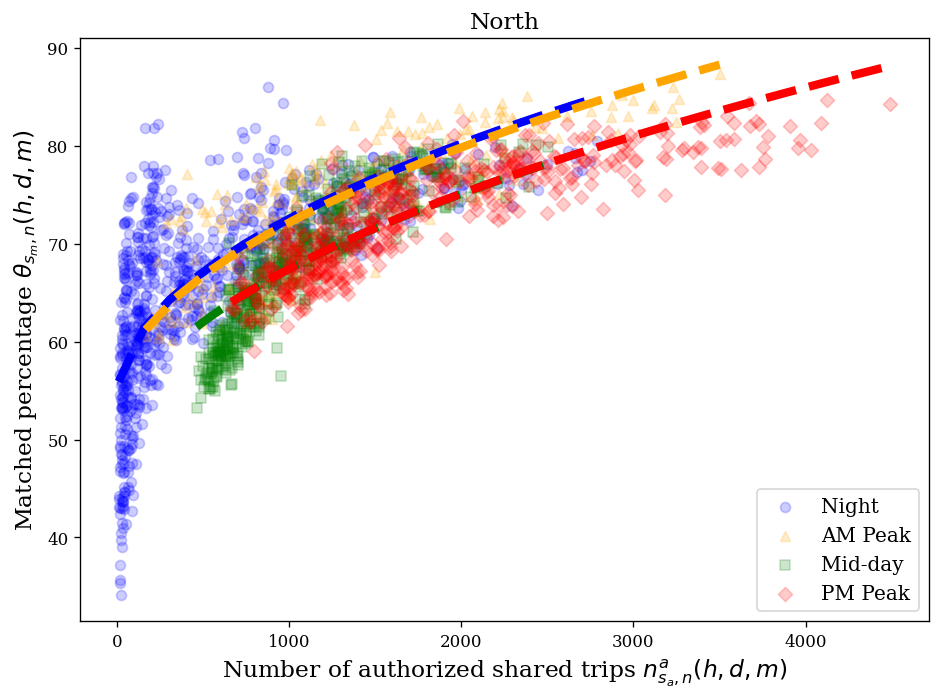

In [8]:
df_hdm = agg_hdm('processed_data','north')
plot_match_rate(df_hdm,'North','sqrt',disaggregate = True)

# Unit Fare Ratio

0.0034690474910445738


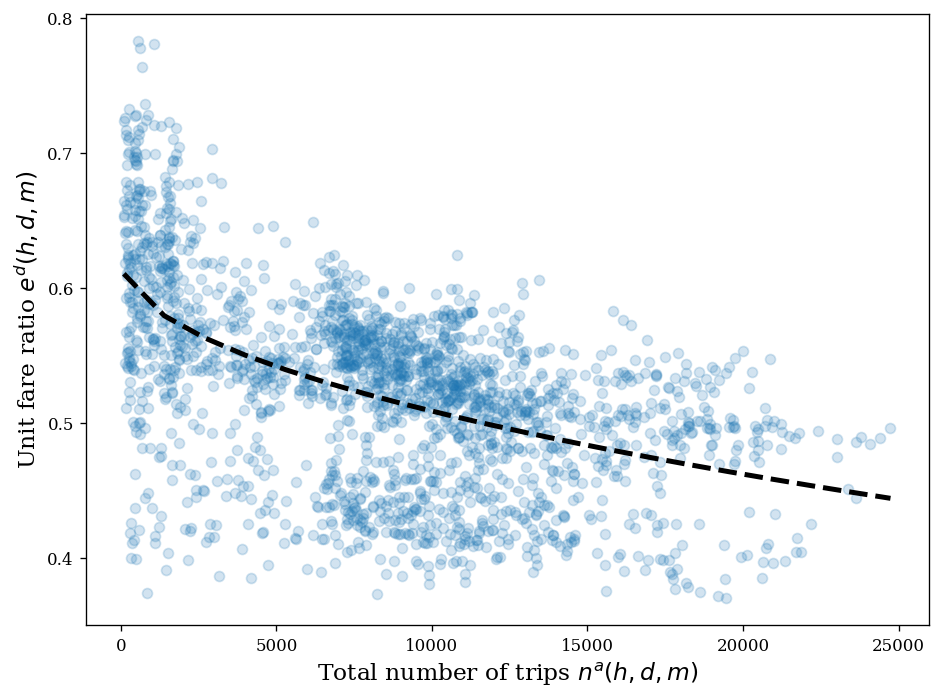

In [9]:
df_hdm = agg_hdm('processed_data')
plot_unit_fare_ratio(df_hdm, '', 'sqrt', disaggregate = False)

0.004646418348494245
Intercept                                     0.629417
C(interval, Treatment('Night'))[T.AM Peak]   -0.021267
C(interval, Treatment('Night'))[T.Mid-day]    0.013941
C(interval, Treatment('Night'))[T.PM Peak]    0.002059
sqrt                                         -0.001213
dtype: float64


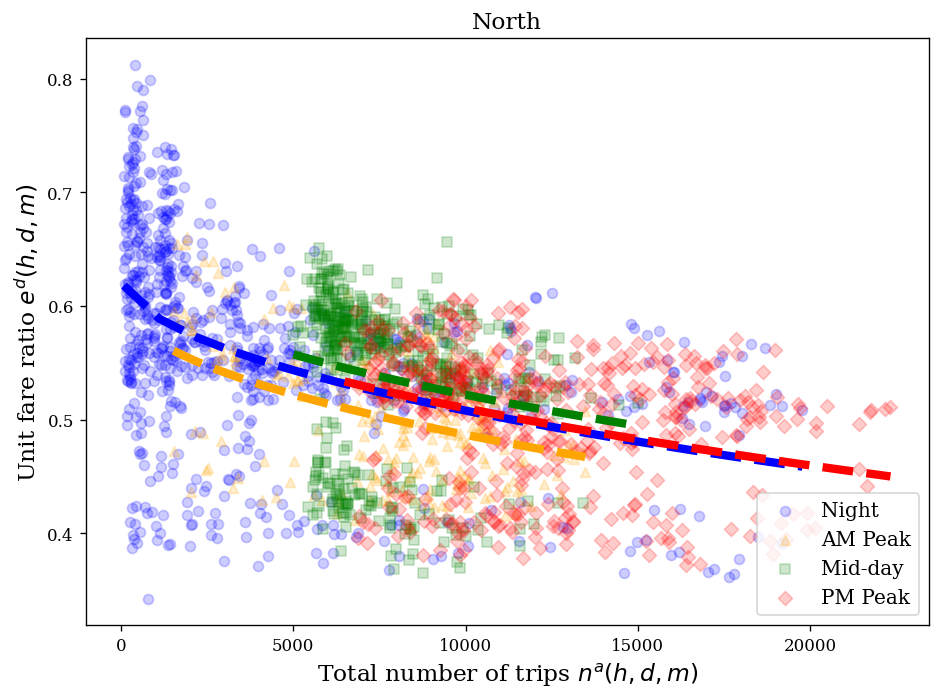

In [10]:
df_hdm = agg_hdm('processed_data','north')
plot_unit_fare_ratio(df_hdm, 'North', 'sqrt', disaggregate = True)